# Deep Learning Worksheet 5&6: MNIST using CNN

## Created by:
### Shubhnoor Gill
### UID: 18BCS6061
### B.E. CSE(AIML-1)/B


**Problem:** MNIST is a simple computer vision dataset. It consists of images of handwritten digits. It also includes labels for each image, telling us which digit it is.

The MNIST data is split into two parts:  60,000  data points of training data, and 10,000  points of test data. Each image is 28 pixels by 28 pixels.

**Objective:** In this notebook, I will try to make simple CNN model and then create complex model. I will also compare the various loss and accuracy related with each model.

**Target:** Classify the label for the handwritten digit given using Convolutional Neural Networks(CNN).


**NOTE:** Each step is explained via comments

# Data Loading and Data Understanding


In this step, I will load the MNIST dataset from keras.dataset and also analyse the dataset while importing important libraries.

## Importing important libraries

In [1]:
# To deal with numpy arrays
import numpy as np

# To randomise the selection
import random as r

# Keras abstraction for creating models with a stack of layers added squentially
from keras.models import Sequential

# Different layers(explained further in notebook)
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D

#  To use the function to_categorical for converting class labels (from digits) to one-hot encoded vectors
from keras.utils import np_utils

#  Load the MNIST dataset from keras.datasets
from keras.datasets import mnist

# To draw plots
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Loading the MINST dataset

In [2]:
# Load the dataset into train and test sets
(x_train ,y_train), (x_test, y_test) = mnist.load_data()

## Understand and explore the data

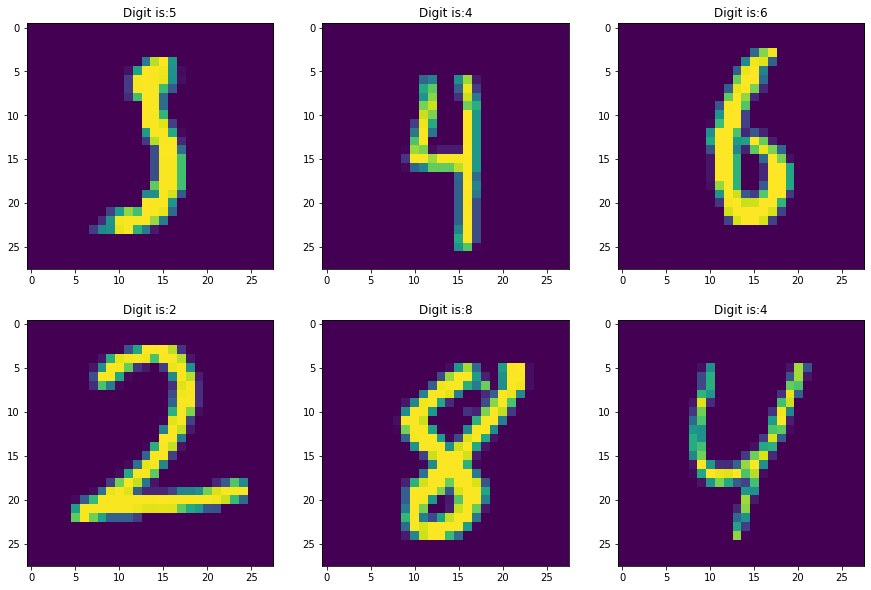

In [3]:
# Plot the images in the dataset
j=[132,2050,4268,7523,6523,8400]  # making a list of some random indexes
plt.figure(figsize=(15,10)) # Changing the plot figure size
for i in range(1,7):
    plt.subplot(2,3,i) # To plot subplots
    plt.title("Digit is:"+ str(y_train[j[i-1]])) # Giving the title to subplots
    plt.imshow(x_train[j[i-1]]) #Plotting the subplot
    

In [4]:
# Check the shape of the data
print("Train data:", x_train.shape,"\n    Labels:", y_train.shape)
print("Test data:", x_test.shape,"\n    Labels:", y_test.shape)

Train data: (60000, 28, 28) 
    Labels: (60000,)
Test data: (10000, 28, 28) 
    Labels: (10000,)


In [5]:
# Check type of data
print("x_train: ",type(x_train))
print("y_train: ",type(y_train))
print("x_test: ",type(x_test))
print("y_test: ",type(y_test))

x_train:  <class 'numpy.ndarray'>
y_train:  <class 'numpy.ndarray'>
x_test:  <class 'numpy.ndarray'>
y_test:  <class 'numpy.ndarray'>


**From above we can observe that 60,000 training and 10,000 test graysacle images each of size 28 x 28 are present and are stored as 2D arrays.**

# Data Preparation

In this step we will perform the following:
- Selecting a sample of data from given dataset
- Converting data to float format
- Rescaling or performing normalisation
- Reshaping our data

## Select a sample from given dataset

We all know that it would take a lot of time to train 60,000 images. Hence, to solve this problem, I will take 25000 random images from the given dataset.

In [6]:
# Select a sample of only 25000 images for training
i = np.random.randint(x_train.shape[0], size=25000) # To select 25000 random indices from the dataset
x_train = x_train[i, :]
y_train = y_train[i]
print("New Train data dimensions:")
print(x_train.shape)
print(y_train.shape)

New Train data dimensions:
(25000, 28, 28)
(25000,)


## Converting data to float format
The pixels are originally stored as type int, so we prefer to convert it to float


In [7]:
# Pixel type before converting to float
x_train.dtype

dtype('uint8')

In [8]:
# Pixel type after converting to float
# type casting one or more of the DataFrame's columns to column-specific types.
x_train = x_train.astype('float32')
x_test=x_test.astype('float32')
x_train.dtype # checking the type of data

dtype('float32')

## Normalizing data

The value of each pixel is between 0-255, so we will rescale each
pixel by dividing by 255 so that the range becomes between 0-1.

In [9]:
# Rescaling our data- convert into fully black and fully white
x_train= x_train/255.0
x_test= x_test/255.0

## Reshaping the data

Our x_train data needs to be of the shape (25000, 28, 28, 1) whereas y_train needs to be of the shape (25000,10) where each image’s label is represented as a 10-d one-hot encoded vector. 

We perform one hot encoding on the y_train and y_test using to_categorical method.

In [10]:
# specify input dimensions of each image
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
class_num = 10 # Number of classes or digit labels in dataset

In [11]:
# Reshaping the data
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols,1) # 1----> channel-----> grayscale
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols,1)
print("New Train data dimensions:")
print(x_train.shape)
print(x_test.shape)

New Train data dimensions:
(25000, 28, 28, 1)
(10000, 28, 28, 1)


### Perform one hot encoding

In [12]:
# Converts a class vector (integers)- class labels to binary class matrix or  one-hot encoded vectors
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]
print("One -hot encoded class label dimensions: ",y_train.shape)

One -hot encoded class label dimensions:  (25000, 10)


# Build 1st CNN Model

I will build a very simple CNN model with:
- 1 convolution layer
- 1 MaxPool layer
- 1 Flatten
- 1 Dense layer(Softmax)

Other hyperparameters used:
- Activation function: relu
- Actvation function used in output layer: Softmax
- Loss: Categorical Loss
- Optimizer: Adam

In [13]:
# Creating first sequential model
model1 = Sequential()

In [14]:
# Adding a keras convolutional layer called Conv2D
# Filter size = 4x4
# input_shape = (img_rows, img_cols, 1)

model1.add(Conv2D(100, (4,4), input_shape=input_shape, padding='same', activation='relu'))

In [15]:
# Add maxpool layer with kernel size 3x3
model1.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
# Flatten the layer
model1.add(Flatten())

In [17]:
# Add softmax layer
model1.add(Dense(class_num ,activation = 'softmax'))

## Compile Model1

In [18]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 100)       1700      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 19600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                196010    
Total params: 197,710
Trainable params: 197,710
Non-trainable params: 0
_________________________________________________________________
None


## Fit and Evaluate the model1

In [20]:
batch_size = 2000
epochs = 10
# Train the model1
hist_1 = model1.fit(x_train, y_train, verbose = 1, validation_data = (x_test, y_test), epochs = epochs, batch_size = batch_size)

Train on 25000 samples, validate on 10000 samples
Epoch 1/10
25000/25000 [==============================] - 23s 910us/step - loss: 1.5871 - accuracy: 0.6784 - val_loss: 0.7545 - val_accuracy: 0.8263
Epoch 2/10
25000/25000 [==============================] - 20s 817us/step - loss: 0.5436 - accuracy: 0.8518 - val_loss: 0.3799 - val_accuracy: 0.8877
Epoch 3/10
25000/25000 [==============================] - 19s 775us/step - loss: 0.3487 - accuracy: 0.8981 - val_loss: 0.3025 - val_accuracy: 0.9120
Epoch 4/10
25000/25000 [==============================] - 20s 782us/step - loss: 0.2850 - accuracy: 0.9171 - val_loss: 0.2562 - val_accuracy: 0.9270
Epoch 5/10
25000/25000 [==============================] - 19s 765us/step - loss: 0.2430 - accuracy: 0.9299 - val_loss: 0.2274 - val_accuracy: 0.9359
Epoch 6/10
25000/25000 [==============================] - 19s 767us/step - loss: 0.2128 - accuracy: 0.9382 - val_loss: 0.1977 - val_accuracy: 0.9425
Epoch 7/10
25000/25000 [==============================] 

In [21]:
# Evaluate the model on test data
scores_1 = model1.evaluate(x_test,y_test,verbose = 1)
print("Accuracy:%.2f%%" % (scores_1[1]*100))
print("Loss:%.2f%%" % (scores_1[0]*100))

10000/10000 [==============================] - 2s 248us/step
Accuracy:96.43%
Loss:12.80%


# Build 2nd CNN Model

I will build a very simple CNN model with:
- 2 convolution layer
- 1 MaxPool layer
- 1 Dropout layer
- 1 Flatten layer
- 1 Dense layer
- 1 Dropout layer
- 1 Dense layer(Softmax)

Other hyperparameters used:
- Activation function: relu
- Actvation function used in output layer: Softmax
- Loss: Categorical Loss
- Optimizer: Adam

In [22]:
# Creating second sequential model
model2 = Sequential()

In [23]:
# Adding a keras convolutional layer called Conv2D
# Filter size = 3x3
# input_shape = (img_rows, img_cols, 1)
model2.add(Conv2D(64,kernel_size=(3,3),input_shape=input_shape,activation='relu'))

In [24]:
# Second convolution layer
model2.add(Conv2D(128,(3,3),activation='relu'))

In [25]:
# Add maxpool layer with kernel size 2x2
model2.add(MaxPooling2D(pool_size=(2,2)))

In [26]:
# Add dropout layer which doesn't alter the output shape and has no trainable parameters
model2.add(Dropout(0.25))

In [27]:
# Add flatten layer
model2.add(Flatten())

In [28]:
# Add dense layer
model2.add(Dense(224,activation='relu'))

In [29]:
# Add dropout layer which drops few neurons to prevent overfitting of data
model2.add(Dropout(0.5))

In [30]:
# Add softmax layer
model2.add(Dense(class_num,activation='softmax'))

## Compile model2

In [31]:
# Compile model2
model2.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])

In [32]:
# Model summary
print(model2.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 224)               4128992   
_________________________________________________________________
dropout_2 (Dropout)          (None, 224)              

## Fit and evaluate the model2

In [33]:
batch_size = 2000
epochs = 10
# Train the model2
hist_2 = model2.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

Train on 25000 samples, validate on 10000 samples
Epoch 1/10
25000/25000 [==============================] - 68s 3ms/step - loss: 1.0710 - accuracy: 0.6596 - val_loss: 0.3849 - val_accuracy: 0.8861
Epoch 2/10
25000/25000 [==============================] - 72s 3ms/step - loss: 0.3723 - accuracy: 0.8883 - val_loss: 0.2098 - val_accuracy: 0.9354
Epoch 3/10
25000/25000 [==============================] - 78s 3ms/step - loss: 0.2262 - accuracy: 0.9336 - val_loss: 0.1323 - val_accuracy: 0.9594
Epoch 4/10
25000/25000 [==============================] - 71s 3ms/step - loss: 0.1503 - accuracy: 0.9552 - val_loss: 0.0923 - val_accuracy: 0.9703
Epoch 5/10
25000/25000 [==============================] - 72s 3ms/step - loss: 0.1103 - accuracy: 0.9674 - val_loss: 0.0735 - val_accuracy: 0.9766
Epoch 6/10
25000/25000 [==============================] - 74s 3ms/step - loss: 0.0836 - accuracy: 0.9761 - val_loss: 0.0618 - val_accuracy: 0.9801
Epoch 7/10
25000/25000 [==============================] - 73s 3ms/st

In [34]:
# Evaluate the model2 on test data
scores_2 = model2.evaluate(x_test,y_test,verbose = 1)
print("Accuracy:%.2f%%" % (scores_2[1]*100))
print("Loss:%.2f%%" % (scores_2[0]*100))

10000/10000 [==============================] - 7s 704us/step
Accuracy:98.51%
Loss:4.53%


# Build 3rd CNN Model

I will build a very simple CNN model with:
- 2 convolution layer
- 1 MaxPool layer
- 1 Dropout layer
- 1 convolution layer
- 1 MaxPool layer
- 1 Dropout layer
- 1 Flatten layer
- 1 Dense layer
- 1 Dropout layer
- 1 Dense layer
- 1 Dropout layer
- 1 Dense layer(Softmax)

Other hyperparameters used:
- Activation function: relu
- Actvation function used in output layer: Softmax
- Loss: Categorical Loss
- Optimizer: Adam

In [35]:
# Create a sequential model3
model3 = Sequential()

In [36]:
# Add first convolution layer with kernel size of 3x3 and stride 1x1 whereas with same padding
model3.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28,28, 1)))

In [37]:
# Add second convolution layer with kernel size of 3x3 and stride 1x1 whereas with same padding
model3.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

In [38]:
# Add maxpool layer with kernel size of 2x2
model3.add(MaxPooling2D(pool_size=(2,2)))

In [39]:
# Add dropout layer
model3.add(Dropout(0.25))

In [40]:
# Add third convolution layer with kernel size of 3x3 and stride 1x1 whereas with same padding
model3.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

In [41]:
# Add maxpool layer with kernel size of 2x2
model3.add(MaxPooling2D(pool_size=(2,2)))

In [42]:
# Add dropout layer
model3.add(Dropout(0.25))

In [43]:
# flatten output of conv
model3.add(Flatten())

In [44]:
# Add dense layer
model3.add(Dense(150, activation='relu'))

In [45]:
# Add dropout layer
model3.add(Dropout(0.4))

In [46]:
# Add dense layer
model3.add(Dense(125, activation='relu'))

In [47]:
# Add dropout layer
model3.add(Dropout(0.3))

In [48]:
# Add softmax output layer
model3.add(Dense(class_num, activation='softmax'))

## Compile model3

In [49]:
# compiling the sequential model
model3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [50]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 75)        33825     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 125)       84500     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 125)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 125)        

## Fit and evaluate model3

In [51]:
batch_size = 2000
epochs = 10
# Train the model3
hist_3 = model3.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

Train on 25000 samples, validate on 10000 samples
Epoch 1/10
25000/25000 [==============================] - 89s 4ms/step - loss: 1.6066 - accuracy: 0.4472 - val_loss: 0.5009 - val_accuracy: 0.8705
Epoch 2/10
25000/25000 [==============================] - 90s 4ms/step - loss: 0.6155 - accuracy: 0.8039 - val_loss: 0.2447 - val_accuracy: 0.9280
Epoch 3/10
25000/25000 [==============================] - 90s 4ms/step - loss: 0.3402 - accuracy: 0.8964 - val_loss: 0.1548 - val_accuracy: 0.9518
Epoch 4/10
25000/25000 [==============================] - 81s 3ms/step - loss: 0.2262 - accuracy: 0.9331 - val_loss: 0.1044 - val_accuracy: 0.9682
Epoch 5/10
25000/25000 [==============================] - 80s 3ms/step - loss: 0.1712 - accuracy: 0.9480 - val_loss: 0.0806 - val_accuracy: 0.9748
Epoch 6/10
25000/25000 [==============================] - 80s 3ms/step - loss: 0.1343 - accuracy: 0.9612 - val_loss: 0.0684 - val_accuracy: 0.9783
Epoch 7/10
25000/25000 [==============================] - 80s 3ms/st

In [52]:
# Evaluate the model3 on test data
scores_3 = model3.evaluate(x_test,y_test,verbose = 1)
print("Accuracy:%.2f%%" % (scores_3[1]*100))
print("Loss:%.2f%%" % (scores_3[0]*100))

10000/10000 [==============================] - 7s 693us/step
Accuracy:98.42%
Loss:4.65%


# Compare models

In this part, I will compare and plot the graphs of the three models created on the basis of accuracy and loss.

In [54]:
import pandas as pd # To create a dataframe
test_loss=[scores_1[0],scores_2[0],scores_3[0]] # test loss list
test_acc=[scores_1[1],scores_2[1],scores_3[1]]  # test accuracy list
# Creating a dataframe to store the model metrics
df_scores=pd.DataFrame({'Test Loss':test_loss,'Test Accuracy':test_acc},index=['model1','model2','model3'])
df_scores

,Test Loss,Test Accuracy
model1,0.128046,0.9643
model2,0.045253,0.9851
model3,0.046548,0.9842


In [55]:
# Create a list of model history
hists = [hist_1, hist_2, hist_3]

In [56]:
# Function to plot the history of all CNN models
def plot_history(hists, attribute, axis=(-1,10,0.85,0.94), loc='lower right'):
 title={'val_loss': 'Validation loss', 'loss': 'Training loss', 'val_accuracy': 'Validation accuracy', 'accuracy': 'Training accuracy'}
 num_hists=len(hists)
 plt.figure(figsize=(12, 8)) # To modify plot size
 plt.axis(axis) # To plot on axis
        
 for i in range(num_hists):
  plt.plot(hists[i].history[attribute]) # Plot the history
 plt.title(title[attribute], fontsize=25) # Add the title to plot
 plt.ylabel(title[attribute])             # Add label on y-axis
 plt.xlabel('Epochs')                     # Add label on y-axis
 plt.legend(['model1','model2','model3'], loc=loc) # Show the legend
 plt.show()                              # Display the plot


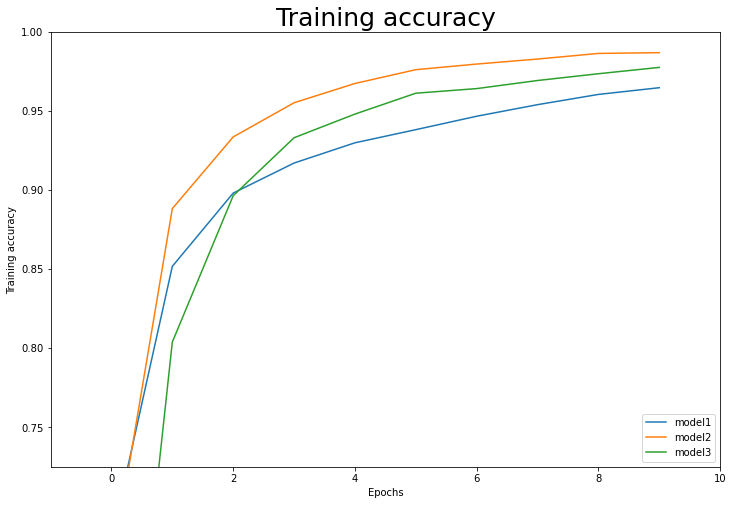

In [57]:
# Plot training accuracy
plot_history(hists, attribute='accuracy', axis=(-1,10,0.725,1), loc='lower right')

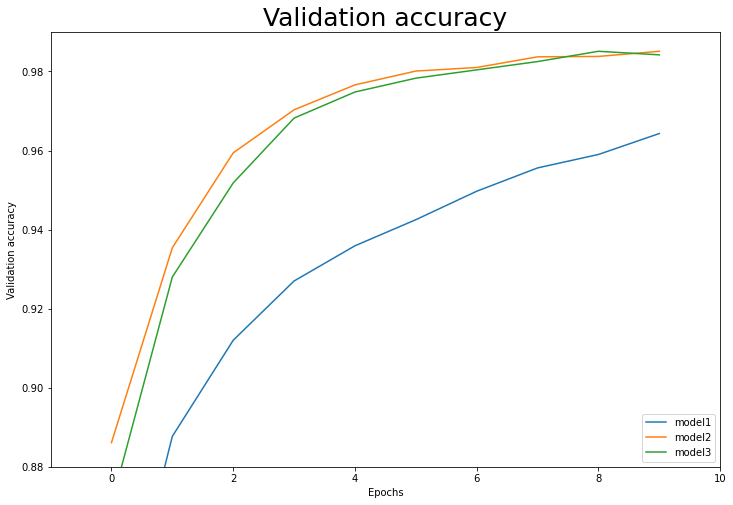

In [58]:
# Plot validation accuracy
plot_history(hists, attribute='val_accuracy',axis=(-1,10,0.88,0.99), loc='lower right')

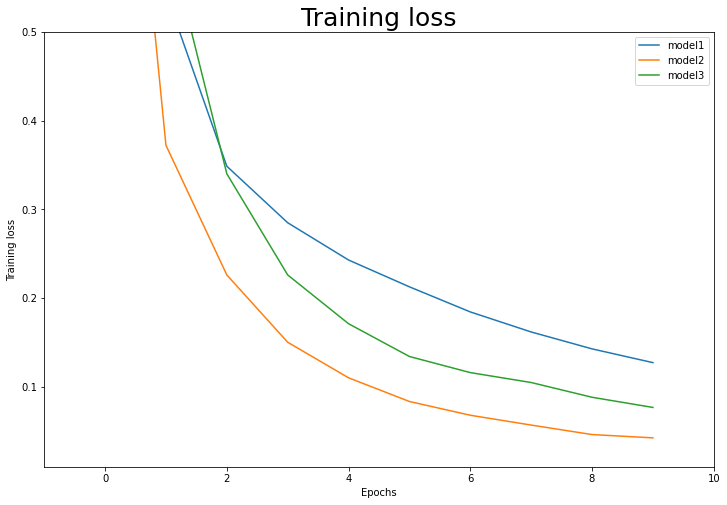

In [59]:
# Plot training loss
plot_history(hists, attribute='loss', axis=(-1,10,0.01,0.5), loc='upper right')

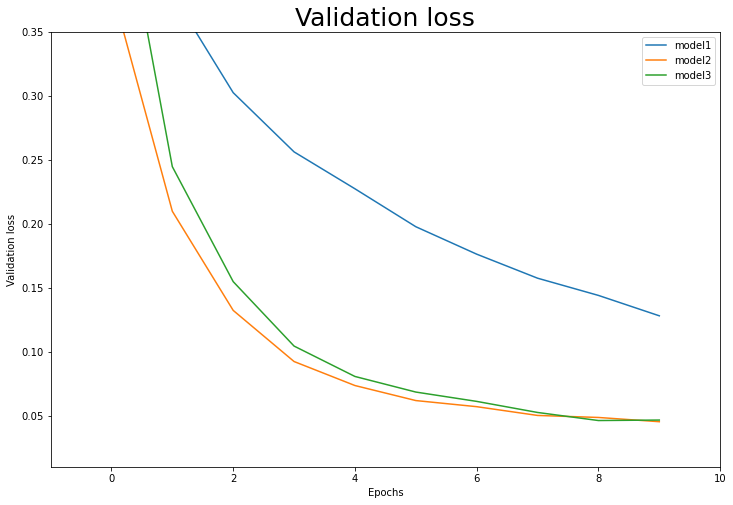

In [60]:
# Plot validation loss
plot_history(hists, attribute='val_loss', axis=(-1,10,0.01,0.35), loc='upper right')

So, we can see that as we increase the number of layers and model complexity, it is not always true that the accuracy will always increase or test loss will always decrease. From the above plots we can see that model2 and model3 perform equally well on test data and the loss for model2 is slightly less than model3.

Hence, we need to keep check of our metrics and build a model in such a way so that the model is less complex and does not overfit or underfit the data.

At last, there is still a room for improvement, we can tune our hyperparameters and our model may perform better than the above models.

**THANK YOU :)**